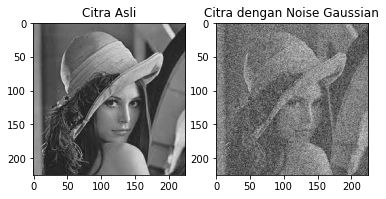

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Load gambar asli
image = cv2.imread('bahan/lenna.jpg',  cv2.IMREAD_GRAYSCALE)
image = np.array(image)

# Parameter noise Gaussian
mean = 0
std_dev = 50

# Generate noise
noise = np.random.randn(*image.shape) * std_dev + mean

# Tambahkan noise ke citra
noisy_image = image + noise

# Tampilkan citra asli dan citra yang terkontaminasi noise
plt.subplot(1, 2, 1)
plt.imshow(image,'gray')
plt.title('Citra Asli')

plt.subplot(1, 2, 2)
plt.imshow(noisy_image,'gray')
plt.title('Citra dengan Noise Gaussian')

plt.show()

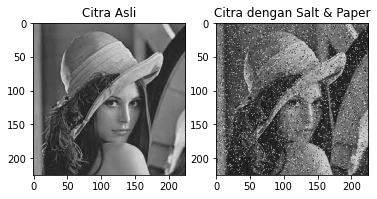

In [2]:

def sp_noise(image, prob):
    '''
    Add salt and pepper noise to image
    prob: Probability of the noise
    '''
    output = image.copy()
    if len(image.shape) == 2:
        black = 0
        white = 255            
    else:
        colorspace = image.shape[2]
        if colorspace == 3:  # RGB
            black = np.array([0, 0, 0], dtype='uint8')
            white = np.array([255, 255, 255], dtype='uint8')
        else:  # RGBA
            black = np.array([0, 0, 0, 255], dtype='uint8')
            white = np.array([255, 255, 255, 255], dtype='uint8')
    probs = np.random.random(output.shape[:2])
    output[probs < (prob / 2)] = black
    output[probs > 1 - (prob / 2)] = white
    return output
salt = sp_noise(image, 0.1)
# Tampilkan citra asli dan citra yang terkontaminasi noise
plt.subplot(1, 2, 1)
plt.imshow(image,'gray')
plt.title('Citra Asli')

plt.subplot(1, 2, 2)
plt.imshow(salt,'gray')
plt.title('Citra dengan Salt & Paper')

plt.show()

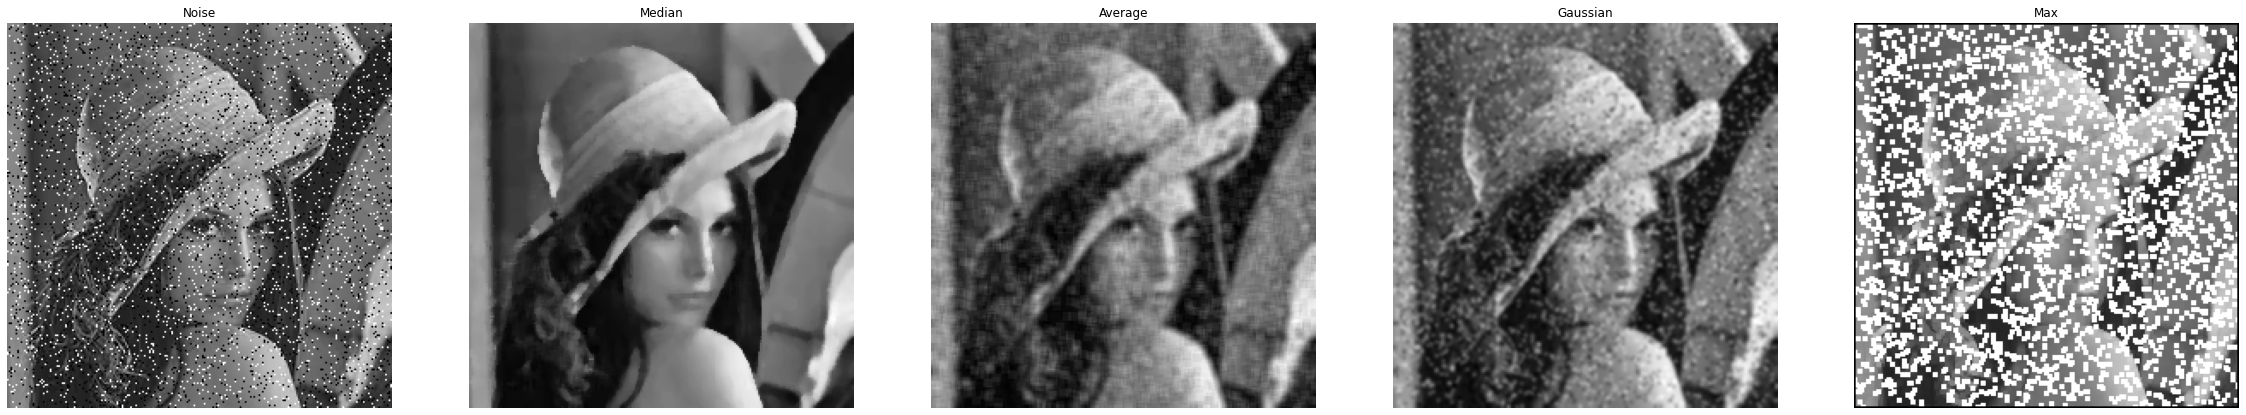

In [16]:
# Median Blur
median_blurred = cv2.medianBlur(salt, 5) # Gunakan kernel ukuran 5x5

# Max Blur

def max_blur(image, kernel_size):
    height, width = image.shape
    blurred_image = np.zeros_like(image)
    for y in range(kernel_size[1] // 2, height - kernel_size[1] // 2):
        for x in range(kernel_size[0] // 2, width - kernel_size[0] // 2):
            window = image[y - kernel_size[1] // 2: y + kernel_size[1] // 2 + 1,
                           x - kernel_size[0] // 2: x + kernel_size[0] // 2 + 1]
            
            blurred_image[y, x] = np.max(window[:, :])
    return blurred_image

# Average Blur
average_blurred = cv2.blur(salt, (5, 5)) # Gunakan kernel ukuran 5x5

gaussian_blurred = cv2.GaussianBlur(salt, (5, 5), 0) # Gunakan kernel ukuran 5x5, sigma=0

plt.figure(figsize=(40, 12))
plt.subplot(1, 5, 1)
plt.imshow(salt,'gray')
plt.title('Noise')
plt.axis('off')
plt.subplot(1, 5, 2)
plt.imshow(median_blurred,'gray')
plt.title('Median')
plt.axis('off')
plt.subplot(1, 5, 3)
plt.imshow(average_blurred,'gray')
plt.title('Average')
plt.axis('off')
plt.subplot(1, 5, 4)
plt.imshow(gaussian_blurred,'gray')
plt.title('Gaussian')
plt.axis('off')

plt.subplot(1, 5, 5)
plt.imshow(max_blur(salt,(2,2)),'gray')
plt.title('Max')
plt.axis('off')
plt.show()



SNR: 17.01 dB
PSNR: 29.80 dB
MSE: 68.11
RMSE: 8.25
MAE: 136.11


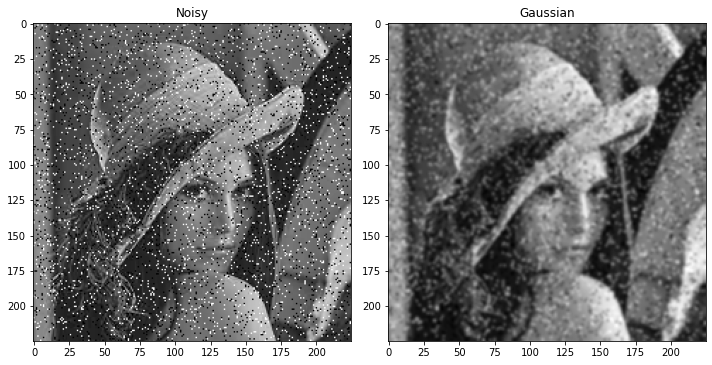

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def calculate_metrics(image1, image2):
    """
    Hitung metrik kualitas gambar: SNR, PSNR, MSE, RMSE, MAE.

    Args:
        image1: Gambar asli.
        image2: Gambar yang diproses atau gambar referensi.

    Returns:
        tuple: SNR, PSNR, MSE, RMSE, MAE.
    """

    # Konversi gambar ke grayscale jika gambar berwarna
    if len(image1.shape) == 3:
        image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
        image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

    # Hitung MSE
    mse = np.mean((image1 - image2) ** 2)

    # Hitung RMSE
    rmse = np.sqrt(mse)

    # Hitung MAE
    mae = np.mean(np.abs(image1 - image2))

    # Hitung SNR
    snr = 10 * np.log10(np.var(image1) / mse)

    # Hitung PSNR
    psnr = 10 * np.log10(255**2 / mse)

    return snr, psnr, mse, rmse, mae



#NOISE DENGAN PERBAIKAN


# Hitung metrik
snr, psnr, mse, rmse, mae = calculate_metrics(salt, gaussian_blurred)

# Tampilkan hasil
print(f"SNR: {snr:.2f} dB")
print(f"PSNR: {psnr:.2f} dB")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

# Tampilkan gambar dalam plt
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(salt,'gray')
plt.title('Noisy')
plt.subplot(1, 2, 2)
plt.imshow(gaussian_blurred, 'gray')
plt.title('Gaussian')
plt.tight_layout()
plt.show()

SNR: 16.73 dB
PSNR: 29.52 dB
MSE: 72.67
RMSE: 8.52
MAE: 143.71


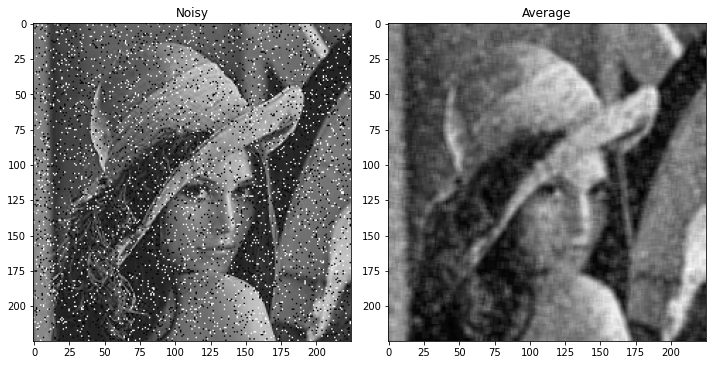

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def calculate_metrics(image1, image2):
    """
    Hitung metrik kualitas gambar: SNR, PSNR, MSE, RMSE, MAE.

    Args:
        image1: Gambar asli.
        image2: Gambar yang diproses atau gambar referensi.

    Returns:
        tuple: SNR, PSNR, MSE, RMSE, MAE.
    """

    # Konversi gambar ke grayscale jika gambar berwarna
    if len(image1.shape) == 3:
        image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
        image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

    # Hitung MSE
    mse = np.mean((image1 - image2) ** 2)

    # Hitung RMSE
    rmse = np.sqrt(mse)

    # Hitung MAE
    mae = np.mean(np.abs(image1 - image2))

    # Hitung SNR
    snr = 10 * np.log10(np.var(image1) / mse)

    # Hitung PSNR
    psnr = 10 * np.log10(255**2 / mse)

    return snr, psnr, mse, rmse, mae



#NOISE DENGAN PERBAIKAN


# Hitung metrik
snr, psnr, mse, rmse, mae = calculate_metrics(salt, average_blurred)

# Tampilkan hasil
print(f"SNR: {snr:.2f} dB")
print(f"PSNR: {psnr:.2f} dB")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

# Tampilkan gambar dalam plt
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(salt,'gray')
plt.title('Noisy')
plt.subplot(1, 2, 2)
plt.imshow(average_blurred, 'gray')
plt.title('Average')
plt.tight_layout()
plt.show()

SNR: 19.38 dB
PSNR: 32.17 dB
MSE: 39.45
RMSE: 6.28
MAE: 95.52


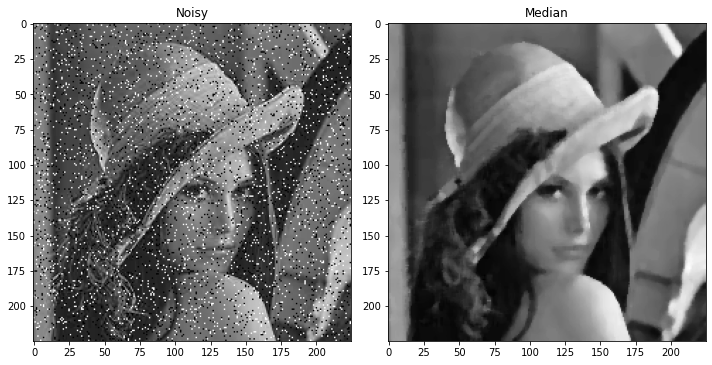

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def calculate_metrics(image1, image2):
    """
    Hitung metrik kualitas gambar: SNR, PSNR, MSE, RMSE, MAE.

    Args:
        image1: Gambar asli.
        image2: Gambar yang diproses atau gambar referensi.

    Returns:
        tuple: SNR, PSNR, MSE, RMSE, MAE.
    """

    # Konversi gambar ke grayscale jika gambar berwarna
    if len(image1.shape) == 3:
        image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
        image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

    # Hitung MSE
    mse = np.mean((image1 - image2) ** 2)

    # Hitung RMSE
    rmse = np.sqrt(mse)

    # Hitung MAE
    mae = np.mean(np.abs(image1 - image2))

    # Hitung SNR
    snr = 10 * np.log10(np.var(image1) / mse)

    # Hitung PSNR
    psnr = 10 * np.log10(255**2 / mse)

    return snr, psnr, mse, rmse, mae



#NOISE DENGAN PERBAIKAN


# Hitung metrik
snr, psnr, mse, rmse, mae = calculate_metrics(salt, median_blurred)

# Tampilkan hasil
print(f"SNR: {snr:.2f} dB")
print(f"PSNR: {psnr:.2f} dB")


print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

# Tampilkan gambar dalam plt
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(salt,'gray')
plt.title('Noisy')
plt.subplot(1, 2, 2)
plt.imshow(median_blurred, 'gray')
plt.title('Median')
plt.tight_layout()
plt.show()

SNR: 16.87 dB
PSNR: 29.65 dB
MSE: 70.41
RMSE: 8.39
MAE: 160.12


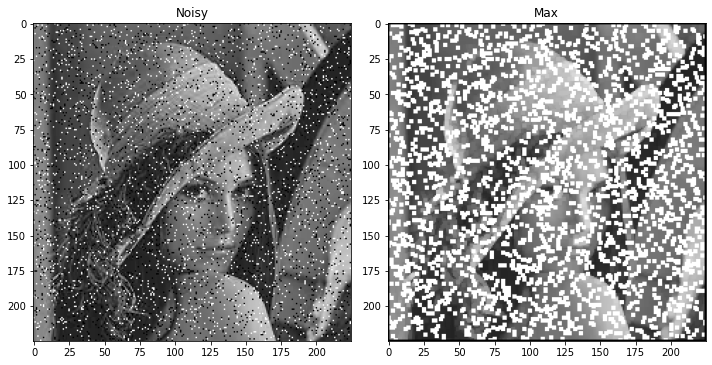

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def calculate_metrics(image1, image2):
    """
    Hitung metrik kualitas gambar: SNR, PSNR, MSE, RMSE, MAE.

    Args:
        image1: Gambar asli.
        image2: Gambar yang diproses atau gambar referensi.

    Returns:
        tuple: SNR, PSNR, MSE, RMSE, MAE.
    """

    # Konversi gambar ke grayscale jika gambar berwarna
    if len(image1.shape) == 3:
        image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
        image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

    # Hitung MSE
    mse = np.mean((image1 - image2) ** 2)

    # Hitung RMSE
    rmse = np.sqrt(mse)

    # Hitung MAE
    mae = np.mean(np.abs(image1 - image2))

    # Hitung SNR
    snr = 10 * np.log10(np.var(image1) / mse)

    # Hitung PSNR
    psnr = 10 * np.log10(255**2 / mse)

    return snr, psnr, mse, rmse, mae



#NOISE DENGAN PERBAIKAN


# Hitung metrik
snr, psnr, mse, rmse, mae = calculate_metrics(salt, max_blur(salt,(2,2)))

# Tampilkan hasil
print(f"SNR: {snr:.2f} dB")
print(f"PSNR: {psnr:.2f} dB")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

# Tampilkan gambar dalam plt
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(salt,'gray')
plt.title('Noisy')
plt.subplot(1, 2, 2)
plt.imshow(max_blur(salt,(2,2)), 'gray')
plt.title('Max')
plt.tight_layout()
plt.show()